Part 2: Design a visualization
<br>
<br>
Di Tong

In [34]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# import the data used for construting visualization
cols = ["soc_fair", "average_trust", "country"]
data = pd.read_stata("./abs_w4.dta", columns=cols)

In [44]:
# Data Transformation: preparing data for constructing the visualization

# construct the data frame for presenting the average level of political trust 
# and perceived income distribution fariness of each country
average_y = data.groupby('country').mean()

# add the district classification (1=east asia; 0 = southeast asia) to the data frame
average_y["district"] = [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# Sort the dataframe based on the value of average political trust within each district in descending order
sorted_average_y = average_y.groupby(['district']).apply(
                    lambda x: x.sort_values(['average_trust'], ascending = False))

# Extract the data for y and x axis
trust_y = sorted_average_y["average_trust"]
soc_fair_y = sorted_average_y["soc_fair"]

# calculate the mean of the average level of political trust and perceived income
# distribution fariness for all 14 countries
mean_countries_trust = trust_y.mean()
mean_countries_fair = soc_fair_y.mean()

In [248]:
# the footnotes for the visualization
notes = """Source: East Asian Barometer Survey (ABS), the fourth wave (2014-2016).
Notes: The bars show the average score of political trust or perceived level of income distributive fairness in a specific society. Political trust is measured using an index 
aggregated from five questions: (1) A system like ours, even if it runs. into problems, deserves the people's support; (2) You can generally trust the people who run our 
government to do what is right; (3) Over the long run, our system of government is capable of solving the problems our country faces; (4) Thinking in general, I am proud of 
our system of government; (5) I would rather live under our system of government than any other that I can think of. Respondents were asked to rate each statement on a 
4-point scale, from (1) strongly disagree to (4) strongly agree. Perceived income distributive fairness of the country/society is also measured under a 4-point scale ranging 
from (1) very unfair to (4) very fair. The x-axis shows the 14 East and Southeast polities surveyed in the fourth wave ABS.""" 

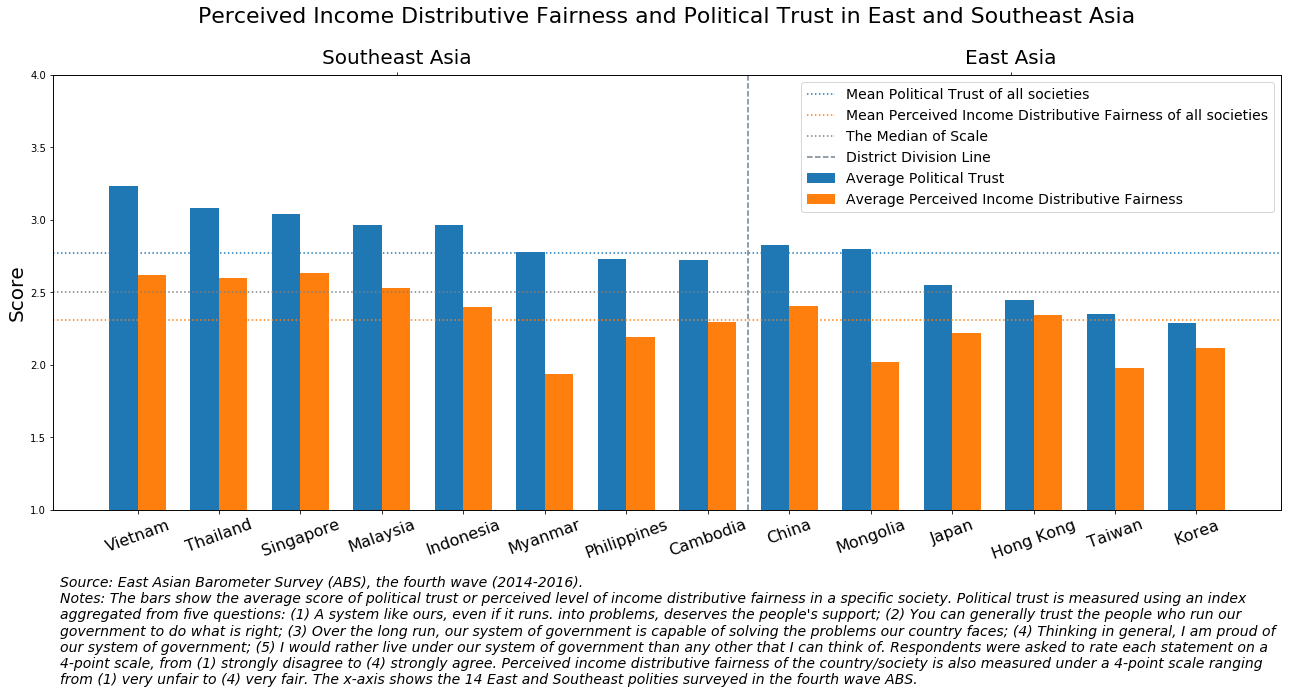

In [249]:
# construct the visualization
ind = np.arange(14)  # the x locations for the groups
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(22,8))
ax2 = ax.twiny() # the second x axis
ax.axhline(y=mean_countries_trust, linestyle=':', label='Mean Political Trust of all societies')
ax.axhline(y=mean_countries_fair, color='C1', linestyle=':', 
           label='Mean Perceived Income Distributive Fairness of all societies')
ax.axhline(y=2.5, color='C7', linestyle=':', 
           label='The Median of Scale')
rects1 = ax.bar(ind - width/2, trust_y, width, label='Average Political Trust')
rects2 = ax.bar(ind + width/2, soc_fair_y, width, label='Average Perceived Income Distributive Fairness')
ax.axvline(x=7.5, color='slategrey', linestyle='--', label = 'District Division Line')
# Add some text for labels, titles and legends
ax.set_ylabel('Score', fontsize=20)
ax.set_ylim([1,4])
ax.text(0.5, 1.12, 'Perceived Income Distributive Fairness and Political Trust in East and Southeast Asia', 
        horizontalalignment='center', fontsize=22, transform = ax2.transAxes)
ax.text(-0.95, -0.2, notes, fontsize=14, fontstyle='italic')
ax.set_xticks(ind)
ax.set_xticklabels(('Vietnam', 'Thailand','Singapore', 'Malaysia', 'Indonesia', 'Myanmar', 'Philippines', \
                    'Cambodia', 'China', 'Mongolia', 'Japan', 'Hong Kong', 'Taiwan', 'Korea'), 
                   fontsize=16, rotation=20)
newpos = [0.28,0.78] # positions of the xticklabels: the position in the new x-axis
newlabel = ['Southeast Asia', 'East Asia']
ax2.set_xticks(newpos)
ax2.set_xticklabels(newlabel, fontsize=20)
ax.legend(fontsize=14)

<br>
Written explanation:
<br>
<br>
  I construct this graph to compare the levels and relationship patterns of perceived distributive fairness and political trust in 14 East and Southeast Asian societies. This graph serves as a descriptive visualization for the dependent variable and key independent variable of my research  studying the contextual contingent variations in the relationship between perceived income distributive fairness and  political trust in East and Southeast Asia. 
<br>
  As is explained in the notes below the figure, the figure is based on the 4th wave of the East Asian Barometer Survey data collected during 2014-2016 with national representative adult sample from 14 Asian polities. See the notes below the figure on how the two key variables (political trust and perceived distributive fairness) are measured.
<br>
<br>
  From the graph, we could see that citizens in Southeast Asian societies generally have higher levels of political trust and perceive their societies as fairer comparing with citizens in East Asian societies. Citizens in most societies of East and Southeast Asia trust their governments while perceive their societies as unfair. It is also notable that the three societies enjoy highest levels of political trust are authoritarian or military polities, while the four societies enjoy highest levels of political trust are the most democratic polities in East Asia, confirming the widely empirically supported intriguing finding that authoritarian regimes tend to receive higher popular support than democratic regime. The relationship between perceived income distributive fairness and  political trust vary widely across societies in East and Southeast Asia.
<br>
<br>
  Bar charts by society is the suitable form to demonstrate comparison of the average level of political trust and perceived distributive fairness between different societies. I further group the countries into district blocks (Southeast Asia and East Asia) to see if societies geographically adjacent to each other manifest similar patterns. The vertical slategrey dashed line between Cambodia and China acts as a district division line. With the help of the two x-label above the figure, the division line informs the readers that the left side of it are Southeast Asian countries and the right side of it are East Asian polities. As I’ve mentioned previously, there is indeed within district similarity in terms of the levels and patterns of perceived income distributive fairness and  political trust. 
<br>
<br>
  Within each district, I sorted the countries in a descending order based on the average level of political trust. Through sorting, the visualization could allow readers to identify patterns easier (for instance, the pattern that more democratic societies enjoy lower level of political trust). As the range and scale for the political trust and perceived distributive fairness measurements are the same (1-4), I could use the same y-axis for them denoting the score of either of the two variables.  Note that the range and scale of y-axis exactly correspond to the range and scale of the two measurements to follow the truthfulness standard of constructing visualization. I use a grey dotted horizontal line at y=2.5 to present the median of the scale in order to let the readers get an absolute sense of the distribution of the two variables across countries (Citizens in most societies have higher than median level of political trust while lower than median level perceived distributive fairness). 
<br>
<br>
  I use blue and orange to represent the politcial trust and perceived distributive fairness, respectively, as they are complementary colors and look pretty. I also use a blue dotted horizontal line and an orange dotted horizontal line to demonstrate the mean of political trust and perceived distributive fairness levels of all 14 societies. These two lines help readers to make comparisons between different societies, for instance, most societies in Southeast Asia have higher than average political trust and perceived distributive fairness, while most societies in East Asia have lower than average political trust and perceived distributive fairness. 
<br>
<br>
  By juxtaposing the average level of political trust and perceived distributive fairness, I seek to compare their relationship patterns between different societies. If the level of distributive fairness descends in a similar relative magnitude as the level of political trust, then we can say that there appear to be a strong and identical correlation between the two variables across different East and Southeast Asian societies. Yet the figure show a much more nuanced pattern, suggesting contextual contingent variation in the relationship between perceived income distributive fairness and  political trust in East and Southeast Asia. Hence, this descriptive graph informs me that it is meaningful to examine what kind of country level features lead to such variation, as the relationship pattern is indeed different for different societies.